In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LassoCV, LogisticRegression, LinearRegression

from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score

from sklearn.tree import DecisionTreeClassifier, plot_tree 

from sklearn.model_selection import GridSearchCV, KFold, cross_val_score, train_test_split

<h3>Question 2.3</h3>

In [2]:

# importing the titanic dataset
titanic = pd.read_csv("titanic3.csv")

In [3]:
# selecting the columns to use in the analysis
titanic = titanic.loc[:, ["pclass", "survived", "age", "sex"]]

In [4]:
# check how many NaNs are in the dataset before imputing
titanic.isna().sum()

pclass        0
survived      0
age         263
sex           0
dtype: int64

In [5]:
# imputing missing values with mean
titanic.fillna(titanic["age"].mean(), inplace = True)

In [6]:
# check how many NaNs are in the dataset after imputing
titanic.isna().sum()

pclass      0
survived    0
age         0
sex         0
dtype: int64

In [7]:
# change sex column to numerical --> male: 1 and female: 0
titanic["sex"] = titanic["sex"].map({"male" : 1, "female" : 0})

In [8]:
# view what the titanic dataset looks like now
print(titanic.head())

   pclass  survived    age  sex
0       1         1  29.00    0
1       1         1   0.92    1
2       1         0   2.00    0
3       1         0  30.00    1
4       1         0  25.00    0


<h4>Decicision Tree Before Pruning</h4>

In [9]:
# setting the independent variables X dataframe, and dependent variables y
y = titanic.loc[:, ["survived"]]
X = titanic.loc[:, ["pclass", "sex", "age"]]

In [10]:
print(y)

      survived
0            1
1            1
2            0
3            0
4            0
...        ...
1304         0
1305         0
1306         0
1307         0
1308         0

[1309 rows x 1 columns]


In [11]:
print(X)

      pclass  sex        age
0          1    0  29.000000
1          1    1   0.920000
2          1    0   2.000000
3          1    1  30.000000
4          1    0  25.000000
...      ...  ...        ...
1304       3    0  14.500000
1305       3    0  29.881138
1306       3    1  26.500000
1307       3    1  27.000000
1308       3    1  29.000000

[1309 rows x 3 columns]


In [12]:
# split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state = 42,
                                                   stratify = y)

In [13]:
# creating decision tree and fitting it
dtc = DecisionTreeClassifier(random_state = 42)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

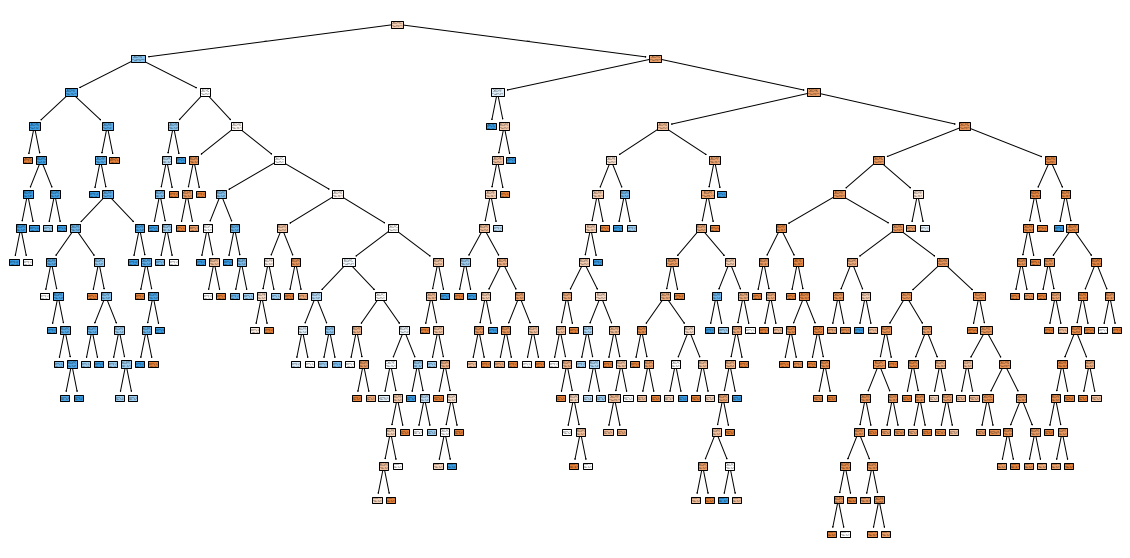

In [14]:

plt.figure(figsize = (20, 10))

# plotting the decision tree
plot_tree(dtc,
          feature_names = X.columns,
          class_names = ["No", "Yes"],
         filled = True)

plt.show()

In [15]:
# predict values
y_pred = dtc.predict(X_test)

In [16]:
confusion_matrix(y_test, y_pred)

array([[137,  25],
       [ 28,  72]])

In [17]:
dtc.feature_importances_

array([0.18647109, 0.46970918, 0.34381973])

In [18]:
accuracy_score(y_test, y_pred)

0.7977099236641222

In [19]:
# setting cross validation function to use later
cv = KFold(n_splits = 10, random_state = 42, shuffle = True)

In [20]:
scores = cross_val_score(dtc, X_train, y_train, scoring = 'accuracy', cv = cv, n_jobs = -1)

In [21]:

print(f"Accuracy: {round(np.mean(scores), 3)}, {round(np.std(scores), 3)}")

Accuracy: 0.76, 0.03


In [22]:
error_rate = 1 - accuracy_score(y_test, y_pred)

In [23]:
print(error_rate)

0.2022900763358778


<h4>Decicision Tree After Pruning</h4>

In [24]:
params = {'max_depth': [2,4,6,8,10,12],
         'min_samples_split': [2,3,4],
         'min_samples_leaf': [1,2]}

In [25]:
dtc = DecisionTreeClassifier()
gcv = GridSearchCV(estimator = dtc, param_grid = params)
gcv.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 4, 6, 8, 10, 12],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3, 4]})

In [26]:
# finding best estimators
model = gcv.best_estimator_
model.fit(X_train,y_train)
y_test_pred = model.predict(X_test)

print(f'Test score {accuracy_score(y_test_pred,y_test)}')

Test score 0.8244274809160306


In [27]:
path = dtc.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
print(ccp_alphas)

[0.00000000e+00 0.00000000e+00 0.00000000e+00 1.15770889e-05
 1.63266639e-05 2.12246631e-05 2.12246631e-05 3.18369946e-05
 3.41110656e-05 3.85902965e-05 4.09332788e-05 4.34140835e-05
 5.46574970e-05 5.64931558e-05 5.92826796e-05 6.24028206e-05
 6.36739892e-05 6.36739892e-05 6.36739892e-05 6.36739892e-05
 7.95924865e-05 9.20998772e-05 1.03889140e-04 1.19388730e-04
 1.22799836e-04 1.41819340e-04 1.46916958e-04 1.49029632e-04
 1.59184973e-04 1.59184973e-04 1.59184973e-04 1.62079245e-04
 1.75103470e-04 1.91021968e-04 1.91021968e-04 2.04666394e-04
 2.04666394e-04 2.09111169e-04 2.13730873e-04 2.31541779e-04
 2.31955246e-04 2.54695957e-04 2.54695957e-04 2.54695957e-04
 2.54695957e-04 2.54695957e-04 2.60484501e-04 2.77850135e-04
 2.81741430e-04 2.86532951e-04 3.18369946e-04 3.18369946e-04
 3.18369946e-04 3.24158490e-04 3.49462699e-04 3.66125438e-04
 3.80437481e-04 3.96873450e-04 4.24493261e-04 4.25076356e-04
 4.77554919e-04 4.91199345e-04 5.09391913e-04 5.09391913e-04
 5.31683376e-04 5.493150

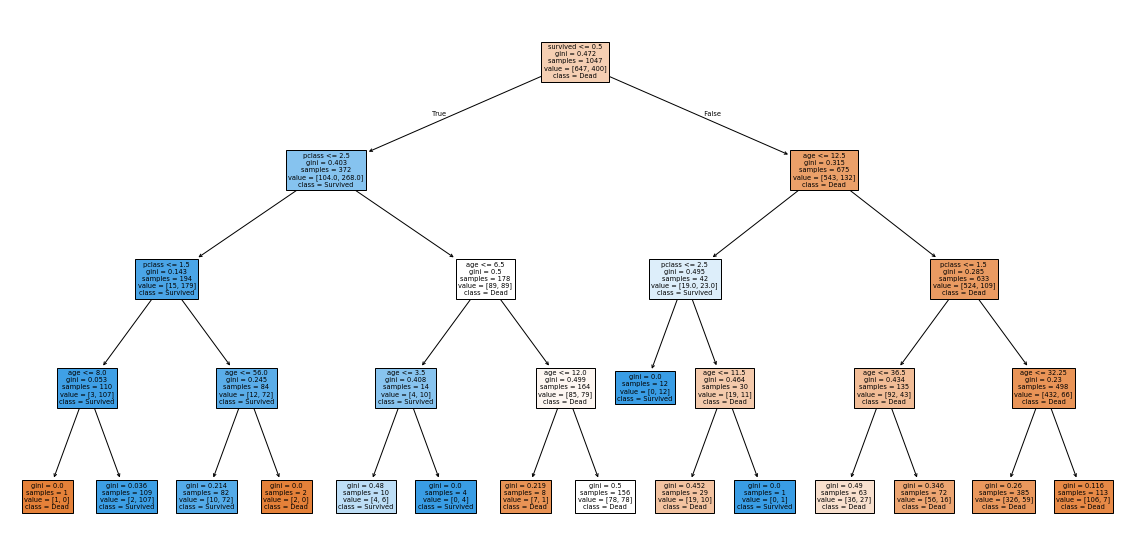

In [28]:
# plot figure
plt.figure(figsize=(20,10))
features = titanic.columns
classes = ['Dead','Survived']
plot_tree(model,feature_names=features,class_names=classes,filled=True)
plt.show()

In [29]:
# cross validation
scores_2 = cross_val_score(model, X_train, y_train, scoring = 'accuracy', cv = cv, n_jobs = -1)

In [30]:
scores_2

array([0.78095238, 0.78095238, 0.79047619, 0.8       , 0.80952381,
       0.76190476, 0.71428571, 0.76923077, 0.75961538, 0.75      ])

In [31]:
print(f"Accuracy: {round(np.mean(scores_2), 3)}, {round(np.std(scores_2), 3)}")

Accuracy: 0.772, 0.026


In [32]:
# calculating error rate
error_rate = 1 - accuracy_score(y_test, y_test_pred)

In [33]:
error_rate

0.17557251908396942

<h4>Logistic Regression</h4>

In [34]:
# logistic regerssion function
log_reg = LogisticRegression(random_state = 42)

In [35]:
# fitting logistic regression
log_reg.fit(X_train, y_train)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(random_state=42)

In [36]:
y_pred_3 = log_reg.predict(X_test)

In [37]:
confusion_matrix(y_test, y_pred_3)

array([[141,  21],
       [ 27,  73]])

In [38]:
accuracy_score(y_test, y_pred_3)

0.816793893129771

In [39]:
scores_3 = cross_val_score(log_reg, X_train, y_train, scoring = 'accuracy', cv = cv, n_jobs = -1)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

In [40]:
scores_3

array([0.81904762, 0.74285714, 0.8       , 0.79047619, 0.8       ,
       0.8       , 0.7047619 , 0.80769231, 0.75      , 0.75      ])

In [41]:
error_rate = 1 - accuracy_score(y_test, y_pred_3)

In [42]:
print(f"Accuracy: {round(np.mean(scores_3), 3)}, {round(np.std(scores_3), 3)}")

Accuracy: 0.776, 0.035


In [43]:
print(error_rate)

0.18320610687022898


<h3>Question 3.2</h3>

In [44]:
from sklearn.preprocessing import StandardScaler

In [45]:
scaler = StandardScaler()

In [46]:
X_train["age"] = scaler.fit_transform(X_train[["age"]])

In [47]:
from sklearn.neighbors import KNeighborsClassifier

In [48]:
knn = KNeighborsClassifier()

In [49]:
knn.fit(X_train, y_train)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [50]:
in_sample_accuracy = knn.score(X_train, y_train)
print(in_sample_accuracy)

0.8194842406876791


In [51]:
scores_knn = cross_val_score(knn, X_train, y_train, scoring = 'accuracy', cv = cv, n_jobs = -1)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

In [52]:
print(f"Accuracy: {round(np.mean(scores_knn), 3)}, {round(np.std(scores_knn), 3)}")

Accuracy: 0.775, 0.028


In [53]:
in_sample_loss = 1 - in_sample_accuracy

In [54]:
cv_default_loss = 1 - cross_val_score(knn, X, y, cv=5).mean()

/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

In [55]:
# define range of neighbors to test
neighbor_range = range(1, 21)

in_sample_losses = []
cv_losses = []

# loop over neighbor values to find most optimal k
for k in neighbor_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    # calcualte in sample loss
    in_sample_accuracy = knn.score(X_train, y_train)
    in_sample_loss = 1 - in_sample_accuracy
    in_sample_losses.append(in_sample_loss)
    
    # cross validate the losses to prepare for graphing
    cv_loss = 1 - cross_val_score(knn, X_train, y_train, cv=5).mean()
    cv_losses.append(cv_loss)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

In [56]:
# optimal k is the one with the least cross-validated losses
optimal_k = neighbor_range[np.argmin(cv_losses)]
optimal_cv_loss = min(cv_losses)
print(f"Optimal Number of Neighbors: {optimal_k}")
print(f"Minimum Cross-Validation Loss: {optimal_cv_loss}")

Optimal Number of Neighbors: 11
Minimum Cross-Validation Loss: 0.2129733424470267


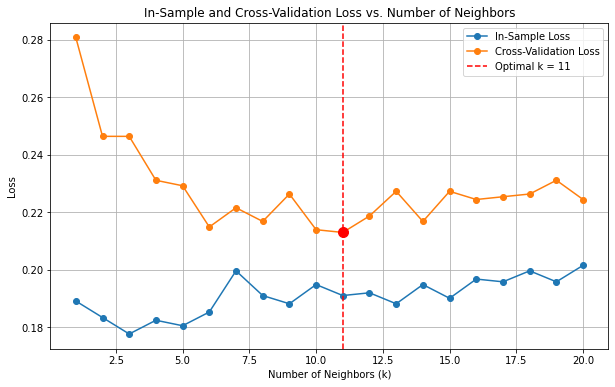

In [57]:
plt.figure(figsize=(10, 6))

# plot in-sample and cross-validation losses
plt.plot(neighbor_range, in_sample_losses, label="In-Sample Loss", marker='o')
plt.plot(neighbor_range, cv_losses, label="Cross-Validation Loss", marker='o')

# v-line for optimal k
plt.axvline(optimal_k, color='r', linestyle='--', label=f"Optimal k = {optimal_k}")
plt.scatter(optimal_k, optimal_cv_loss, color='red', s=100, zorder=5)

# labels, title, grid, and legend
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Loss")
plt.title("In-Sample and Cross-Validation Loss vs. Number of Neighbors")
plt.legend()
plt.grid()
plt.show()

In [58]:
# setting optimal knn model
knn_optimal = KNeighborsClassifier(n_neighbors = optimal_k)

In [59]:
knn_optimal.fit(X_train, y_train)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=11)

In [60]:
# cross validating
in_sample_score_optimal = cross_val_score(knn_optimal, X_train, y_train, scoring = 'accuracy', cv = cv, n_jobs = -1)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

In [61]:
print(f"Accuracy: {round(np.mean(in_sample_score_optimal), 3)}, {round(np.std(in_sample_score_optimal), 3)}")

Accuracy: 0.788, 0.029


In [62]:
# list of distance metrics to test
distance_metrics = ['chebyshev', 'euclidean', 'manhattan']
optimal_k = 5  # Replace this with the optimal k you identified previously

# dictionary to store the cross-validation accuracy for each metric
cv_scores = {}

# loop over each distance metric and calculate the performance of the model for each
for metric in distance_metrics:

    knn = KNeighborsClassifier(n_neighbors=optimal_k, metric=metric)
    
    # cross validate and then average and print
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores[metric] = scores.mean()
    print(f"Cross-Validation Accuracy for {metric}: {scores.mean()}")

/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

Cross-Validation Accuracy for chebyshev: 0.7688767372977898


/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

Cross-Validation Accuracy for euclidean: 0.7707814992025518
Cross-Validation Accuracy for manhattan: 0.7707814992025518


In [63]:
# import wine data
white_wine = pd.read_csv("winequality-white.csv", delimiter = ";")
red_wine = pd.read_csv("winequality-red.csv", delimiter = ";")

In [64]:
# setup data
X_white_wine = white_wine.drop(columns = "quality")
X_red_wine = red_wine.drop(columns = "quality")

y_white_wine = white_wine[["quality"]]
y_red_wine = red_wine[["quality"]]

In [65]:
# find average of features in columns
feature_averages_white = []

for feature in X_white_wine.columns:
    
    feature_average = X_white_wine[feature].mean()
    
    feature_averages_white.append(feature_average)

In [66]:
# find average of features in columns
feature_averages_red = []

for feature in X_red_wine.columns:
    
    feature_average = X_red_wine[feature].mean()
    
    feature_averages_red.append(feature_average)

In [67]:
# create a dataframe with both data for visualization
wine = pd.DataFrame({"Red": feature_averages_red, "White": feature_averages_white},
                    index = X_white_wine.columns)

In [68]:
wine

,Red,White
fixed acidity,8.319637,6.854788
volatile acidity,0.527821,0.278241
citric acid,0.270976,0.334192
residual sugar,2.538806,6.391415
chlorides,0.087467,0.045772
free sulfur dioxide,15.874922,35.308085
total sulfur dioxide,46.467792,138.360657
density,0.996747,0.994027
pH,3.311113,3.188267
sulphates,0.658149,0.489847


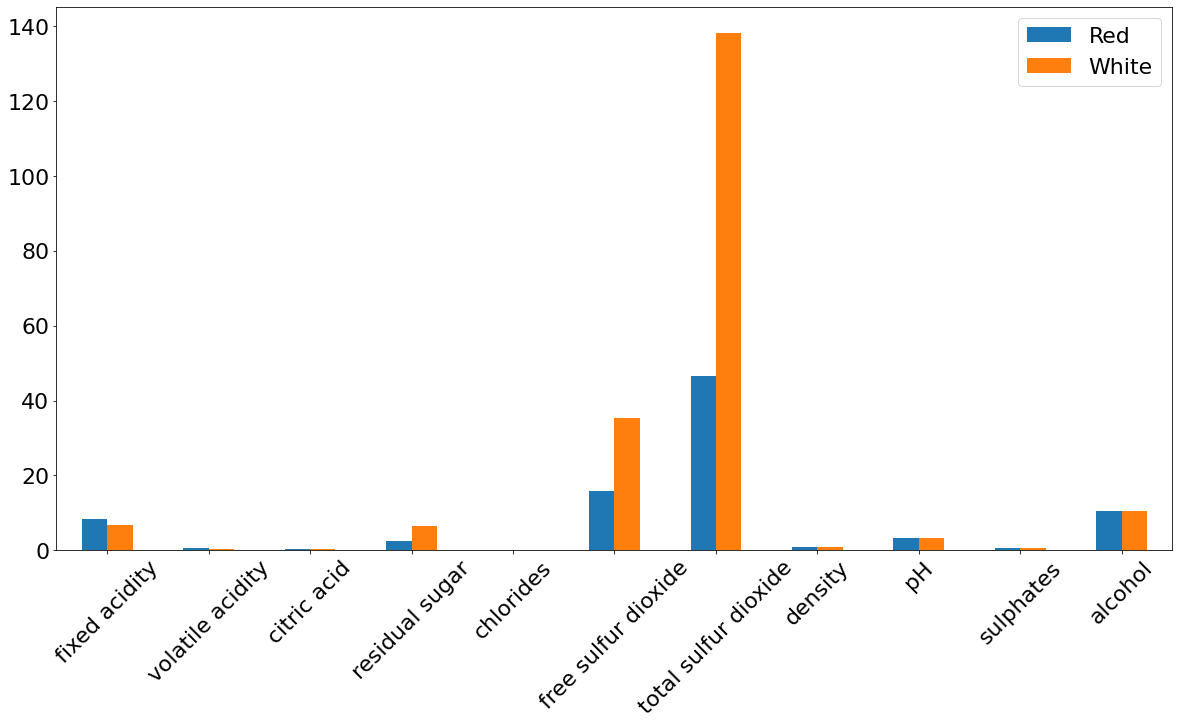

In [69]:
plt.rcParams.update({'font.size': 22})
wine.plot(kind = "bar", figsize = (20, 10))
plt.xticks(rotation = 45)
plt.show()

In [70]:
white_wine_corr = white_wine.corr()
red_wine_corr = red_wine.corr()

In [71]:
# find correlations
white_wine_corr["quality"].drop(index = "quality")

fixed acidity          -0.113663
volatile acidity       -0.194723
citric acid            -0.009209
residual sugar         -0.097577
chlorides              -0.209934
free sulfur dioxide     0.008158
total sulfur dioxide   -0.174737
density                -0.307123
pH                      0.099427
sulphates               0.053678
alcohol                 0.435575
Name: quality, dtype: float64

In [72]:
# find correlations
red_wine_corr["quality"].drop(index = "quality")

fixed acidity           0.124052
volatile acidity       -0.390558
citric acid             0.226373
residual sugar          0.013732
chlorides              -0.128907
free sulfur dioxide    -0.050656
total sulfur dioxide   -0.185100
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166
Name: quality, dtype: float64

In [73]:
white_wine_corr["quality"].drop(index = "quality").idxmax()

'alcohol'

In [74]:
red_wine_corr["quality"].drop(index = "quality").idxmax()

'alcohol'

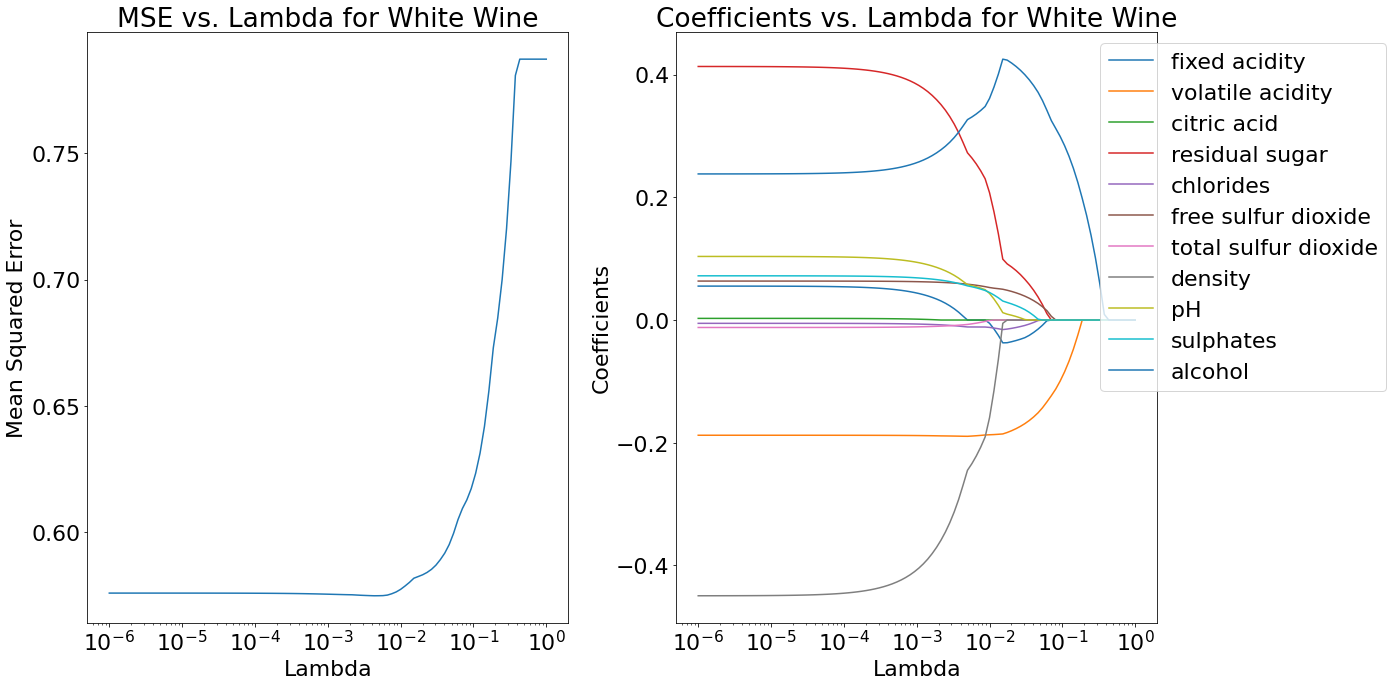

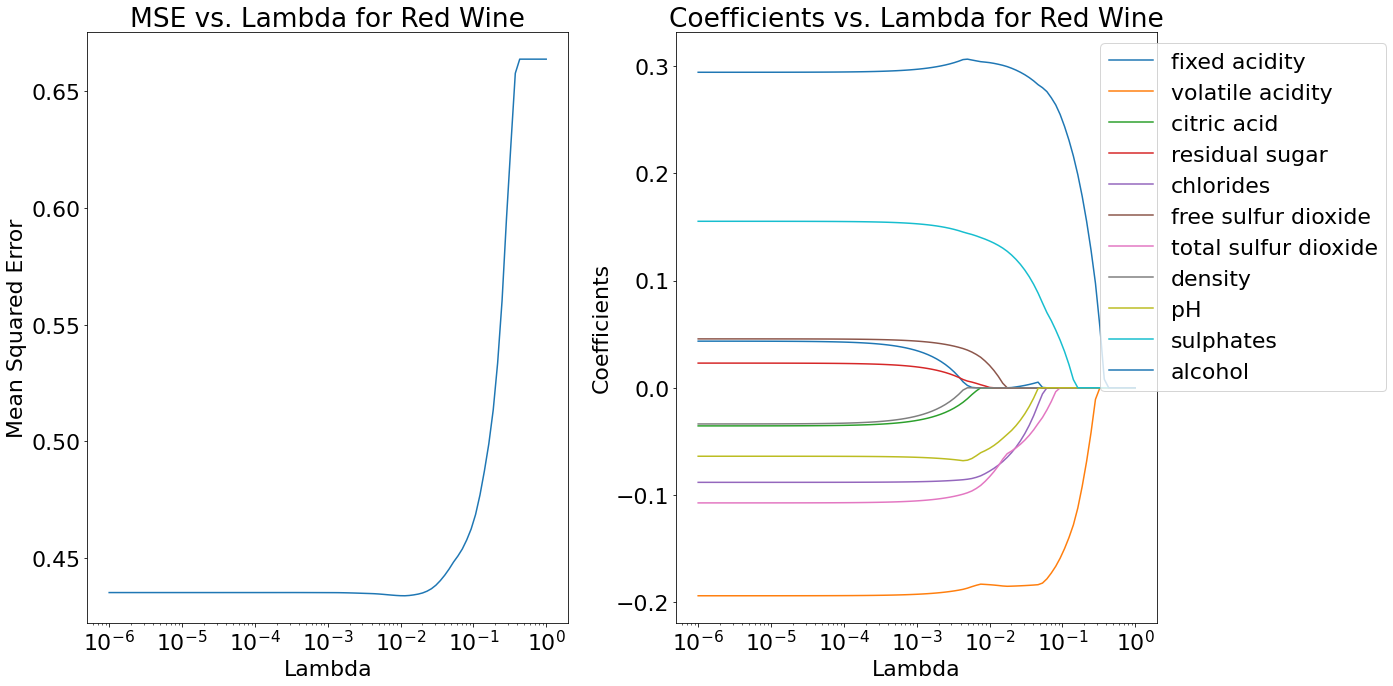

In [75]:
# function to scale numerical data for KNN classifier
def load_and_preprocess_data(data):

    X = data.drop('quality', axis=1)
    y = data['quality']
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    return X_scaled, y, data.columns.drop('quality')

# loading data for both white and red wine and processing the data
X_white, y_white, features_white = load_and_preprocess_data(white_wine)
X_red, y_red, features_red = load_and_preprocess_data(red_wine)

# perform LASSO and plot each predictor on the same graph
def analyze_lasso(X, y, features, wine_type):
    # find best alpha
    lasso_cv = LassoCV(cv = 10, random_state = 0, alphas = np.logspace(-6, 0, 100))
    lasso_cv.fit(X, y)

    # mse vs lambda
    mse_path = np.mean(lasso_cv.mse_path_, axis=1)
    plt.figure(figsize=(20, 10))
    plt.subplot(1, 2, 1)
    plt.semilogx(lasso_cv.alphas_, mse_path)
    plt.xlabel('Lambda')
    plt.ylabel('Mean Squared Error')
    plt.title(f'MSE vs. Lambda for {wine_type} Wine')

    # coeff vs lambda
    plt.subplot(1, 2, 2)
    alphas, coefs, _ = lasso_cv.path(X, y, alphas=lasso_cv.alphas_)
    plt.semilogx(alphas, coefs.T)
    plt.xlabel('Lambda')
    plt.ylabel('Coefficients')
    plt.title(f'Coefficients vs. Lambda for {wine_type} Wine')
    plt.legend(features, loc='upper right', bbox_to_anchor=(1.5, 1))

    plt.tight_layout()
    plt.show()
    
    features = pd.DataFrame(data = lasso_cv.coef_, index = features)
    
    return lasso_cv, features

# white wine
lasso_white, white_features = analyze_lasso(X_white, y_white, features_white, 'White')

# red wine
lasso_red, red_features = analyze_lasso(X_red, y_red, features_red, 'Red')

In [76]:
white_features

,0
fixed acidity,0.006630
volatile acidity,-0.189403
citric acid,0.000000
residual sugar,0.290290
chlorides,-0.010550
free sulfur dioxide,0.059018
total sulfur dioxide,-0.007768
density,-0.270560
pH,0.063299
sulphates,0.057804


In [77]:
red_features

,0
fixed acidity,0.000000
volatile acidity,-0.183984
citric acid,-0.000000
residual sugar,0.000000
chlorides,-0.075135
free sulfur dioxide,0.016124
total sulfur dioxide,-0.078225
density,-0.000000
pH,-0.053809
sulphates,0.134965


In [78]:
red_features_by_lasso = list(red_features.loc[red_features[0] != 0].index)

In [79]:
red_features_by_lasso

['volatile acidity',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'pH',
 'sulphates',
 'alcohol']

In [80]:
white_features_by_lasso = list(white_features.loc[white_features[0] != 0].index)

In [81]:
white_features_by_lasso

['fixed acidity',
 'volatile acidity',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

In [82]:
X_by_lasso = red_wine.loc[:, red_features_by_lasso]

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X_by_lasso, red_wine["quality"],
                                                    test_size = 0.2,
                                                    random_state = 42)

In [84]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [85]:
knn_wine = KNeighborsClassifier()

In [86]:
knn_wine.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [88]:
in_sample_accuracy = knn_wine.score(X_train, y_train)
print(in_sample_accuracy)

0.44566067240031276


/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


In [89]:
scores_knn_wine = cross_val_score(knn_wine, X_train_scaled, y_train, scoring = 'accuracy', cv = cv, n_jobs = -1)

In [90]:
print(f"Accuracy: {round(np.mean(scores_knn_wine), 3)}, {round(np.std(scores_knn_wine), 3)}")

Accuracy: 0.599, 0.052


In [91]:
in_sample_loss = 1 - in_sample_accuracy

In [92]:
cv_default_loss = 1 - cross_val_score(knn_wine, X_train, y_train, cv=5).mean()

In [93]:
# neighbor range to iterate over
neighbor_range = range(1, 21)

# in sample losses and cross validation losses
in_sample_losses = []
cv_losses = []

# loop over all neighbor values
for k in neighbor_range:
    knn_wine = KNeighborsClassifier(n_neighbors = k)
    knn_wine.fit(X_train, y_train)
    
    # calculate in-sample loss
    in_sample_accuracy = knn_wine.score(X_train, y_train)
    in_sample_loss = 1 - in_sample_accuracy
    in_sample_losses.append(in_sample_loss)
    
    # cross-validate loss
    cv_loss = 1 - cross_val_score(knn_wine, X_train, y_train, cv=10).mean()
    cv_losses.append(cv_loss)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(
/opt/anaconda3/lib/python

In [94]:
optimal_k = neighbor_range[np.argmin(cv_losses)]
optimal_cv_loss = min(cv_losses)
print(f"Optimal Number of Neighbors: {optimal_k}")
print(f"Minimum Cross-Validation Loss: {optimal_cv_loss}")

Optimal Number of Neighbors: 1
Minimum Cross-Validation Loss: 0.40266978346456694


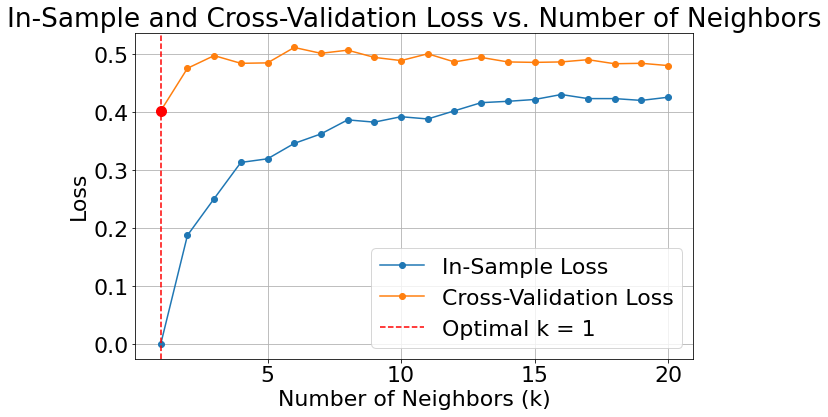

In [95]:
plt.figure(figsize = (10, 6))


plt.plot(neighbor_range, in_sample_losses, label = "In-Sample Loss", marker = 'o')
plt.plot(neighbor_range, cv_losses, label = "Cross-Validation Loss", marker = 'o')


plt.axvline(optimal_k, color = 'r', linestyle = '--', label = f"Optimal k = {optimal_k}")
plt.scatter(optimal_k, optimal_cv_loss, color = 'red', s = 100, zorder = 5)


plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Loss")
plt.title("In-Sample and Cross-Validation Loss vs. Number of Neighbors")
plt.legend()
plt.grid()
plt.show()

In [96]:
knn_optimal_wine = KNeighborsClassifier(n_neighbors = optimal_k)

In [97]:
knn_optimal_wine.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=1)

In [98]:
in_sample_score_optimal_wine = cross_val_score(knn_optimal_wine, X_train, y_train, scoring = 'accuracy', cv = cv, n_jobs = -1)

In [99]:
print(f"Accuracy: {round(np.mean(in_sample_score_optimal_wine), 3)}, {round(np.std(in_sample_score_optimal_wine), 3)}")

Accuracy: 0.59, 0.061


In [100]:
y_pred_knn_red_wine = knn_optimal_wine.predict(X_test_scaled)

In [101]:
accuracy_score(y_test, y_pred_knn_red_wine)

0.63125

In [102]:
mse_knn_wine = mean_squared_error(y_test, y_pred_knn_red_wine)
r2_knn_wine = r2_score(y_test, y_pred_knn_red_wine)

In [103]:
print("mse: ", mse_knn_wine, "r^2:", r2_knn_wine)

mse:  0.534375 r^2: 0.18229501337437803


In [104]:
lin_reg = LinearRegression()

In [105]:
lin_reg.fit(X_train, y_train)

LinearRegression()

In [106]:
print(X_train)

      volatile acidity  chlorides  free sulfur dioxide  total sulfur dioxide  \
493              0.690      0.086                 23.0                  81.0   
354              0.210      0.066                 40.5                 165.0   
342              0.390      0.118                  6.0                  14.0   
834              0.685      0.088                 16.0                  23.0   
705              1.035      0.073                 11.0                  54.0   
...                ...        ...                  ...                   ...   
1130             0.600      0.058                  5.0                  10.0   
1294             0.635      0.073                 25.0                  60.0   
860              0.620      0.077                 15.0                  85.0   
1459             0.200      0.054                  7.0                  15.0   
1126             0.290      0.063                  3.0                  11.0   

        pH  sulphates  alcohol  
493   

In [107]:
y_pred_linreg_red_wine = lin_reg.predict(X_test)

In [ ]:
mse_linreg_wine = mean_squared_error(y_test, y_pred_linreg_red_wine)
r2_linreg_wine = r2_score(y_test, y_pred_linreg_red_wine)

In [ ]:
print("mse: ", mse_linreg_wine, "r^2:", r2_linreg_wine)